In [1]:
!pip install opencv-python pillow


In [2]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [3]:
!pip install tensorflow==2.15

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uni

In [1]:
# TensorFlow & Keras imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization, Activation, GlobalAveragePooling2D)
from tensorflow.keras.applications import ResNet50, MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Basic imports
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Project Paths
project_path = '/content/drive/MyDrive/Colab Notebooks/DL project dataset/Tumour'
os.makedirs(project_path, exist_ok=True)
os.chdir(project_path)
os.makedirs('models', exist_ok=True)

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 4  # Glioma, Meningioma, Pituitary, No Tumor
EPOCHS = 20

# Directories
train_dir = os.path.join(project_path, 'train')
valid_dir = os.path.join(project_path, 'valid')
test_dir = os.path.join(project_path, 'test')

# Dataset Analysis: Class Counts
def plot_class_distribution(generator, title):
    class_labels = list(generator.class_indices.keys())
    class_counts = [0] * len(class_labels)

    for _, labels in generator:
        for label in labels:
            class_counts[np.argmax(label)] += 1
        if sum(class_counts) >= generator.samples:
            break

    plt.figure(figsize=(6, 4))
    plt.bar(class_labels, class_counts)
    plt.title(title)
    plt.xlabel("Classes")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

In [3]:
# Load Data
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


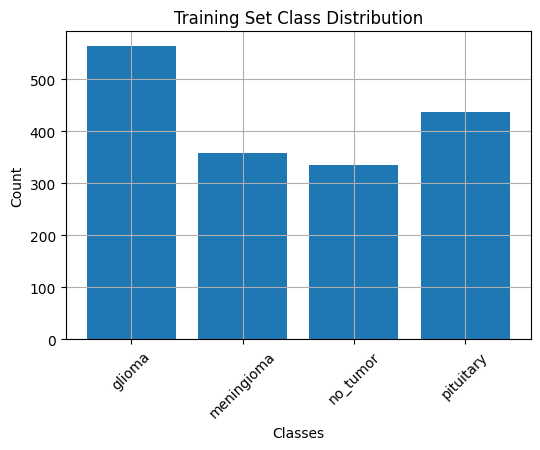

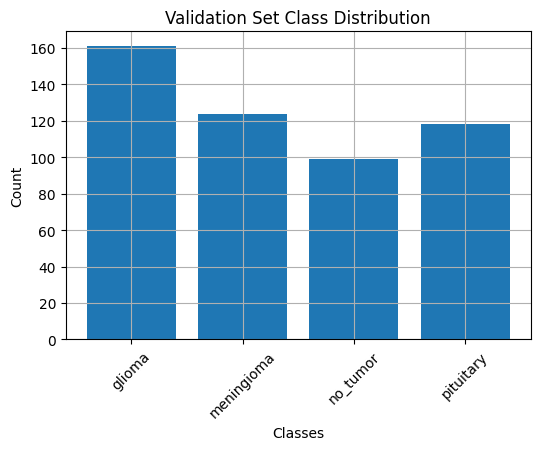

In [ ]:
# Class Distribution Plots
plot_class_distribution(train_generator, "Training Set Class Distribution")
plot_class_distribution(valid_generator, "Validation Set Class Distribution")

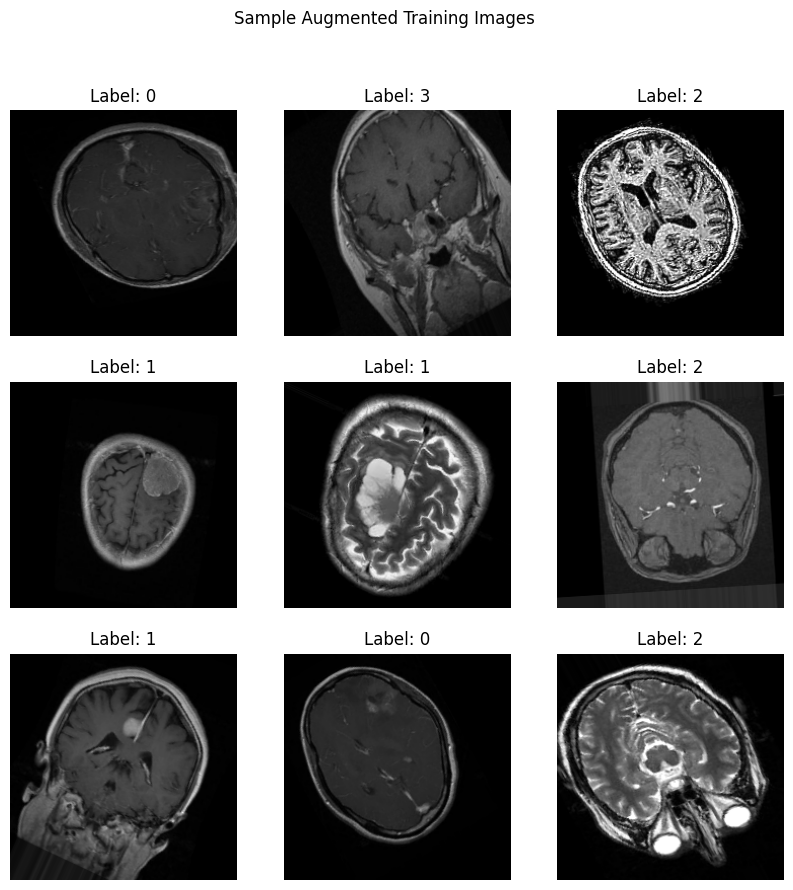

In [ ]:
# Sample Images
images, labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {np.argmax(labels[i])}")
    plt.axis("off")
plt.suptitle("Sample Augmented Training Images")
plt.show()

In [4]:
# Custom CNN
custom_model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(), Activation('relu'),
    MaxPooling2D(), Dropout(0.25),

    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(), Activation('relu'),
    MaxPooling2D(), Dropout(0.25),

    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(), Activation('relu'),
    MaxPooling2D(), Dropout(0.3),

    Flatten(),
    Dense(256), BatchNormalization(), Activation('relu'), Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])
custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='recall')])
custom_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      1

In [ ]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
cnn_ckpt = ModelCheckpoint(filepath=os.path.join(project_path, 'models', 'custom_cnn.h5'),
                           monitor='val_loss', save_best_only=True)

# Train Custom CNN
history_cnn = custom_model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    callbacks=[early_stop, cnn_ckpt]
)

Epoch 1/10
53/53 [==============================] - ETA: 0s - loss: 0.7869 - accuracy: 0.7009 - precision: 0.7406 - recall: 0.6501

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


53/53 [==============================] - 341s 6s/step - loss: 0.7869 - accuracy: 0.7009 - precision: 0.7406 - recall: 0.6501 - val_loss: 1.5352 - val_accuracy: 0.3506 - val_precision: 0.3549 - val_recall: 0.3386
Epoch 2/10
53/53 [==============================] - 350s 7s/step - loss: 0.7294 - accuracy: 0.7257 - precision: 0.7668 - recall: 0.6749 - val_loss: 1.5664 - val_accuracy: 0.3187 - val_precision: 0.3216 - val_recall: 0.3108
Epoch 3/10
53/53 [==============================] - 333s 6s/step - loss: 0.7193 - accuracy: 0.7145 - precision: 0.7549 - recall: 0.6543 - val_loss: 1.5547 - val_accuracy: 0.3127 - val_precision: 0.3087 - val_recall: 0.2251
Epoch 4/10
53/53 [==============================] - 341s 6s/step - loss: 0.7028 - accuracy: 0.7274 - precision: 0.7658 - recall: 0.6714 - val_loss: 0.8065 - val_accuracy: 0.7072 - val_precision: 0.7967 - val_recall: 0.5857
Epoch 5/10
53/53 [==============================] - 347s 6s/step - loss: 0.6637 - accuracy: 0.7457 - precision: 0.7899 

In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

def build_resnet50(input_shape=(224, 224, 3), num_classes=4):
    base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base.layers:
        layer.trainable = False

    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base.input, outputs=output)
    return model

resnet50_model = build_resnet50()  # or build_mobilenetv2(), build_efficientnetb0()

resnet50_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='recall')]
)



94765736/94765736 [==============================] - 0s 0us/step


In [13]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
resnet50_ckpt = ModelCheckpoint(filepath=os.path.join(project_path, 'models', 'resnet50_model.h5'),
                           monitor='val_loss', save_best_only=True)

# Train Resnet50

history_resnet50 = resnet50_model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    callbacks=[early_stop, resnet50_ckpt]
)

Epoch 1/10
53/53 [==============================] - 466s 9s/step - loss: 1.2579 - accuracy: 0.4201 - precision: 0.5752 - recall: 0.1398 - val_loss: 1.1176 - val_accuracy: 0.4781 - val_precision: 0.8194 - val_recall: 0.2530
Epoch 2/10
53/53 [==============================] - 414s 8s/step - loss: 1.2243 - accuracy: 0.4395 - precision: 0.6160 - recall: 0.1912 - val_loss: 1.1130 - val_accuracy: 0.5657 - val_precision: 0.8364 - val_recall: 0.0916
Epoch 3/10
53/53 [==============================] - 416s 8s/step - loss: 1.2179 - accuracy: 0.4484 - precision: 0.5985 - recall: 0.1900 - val_loss: 1.1130 - val_accuracy: 0.4801 - val_precision: 0.7857 - val_recall: 0.1972
Epoch 4/10
53/53 [==============================] - 464s 9s/step - loss: 1.2137 - accuracy: 0.4537 - precision: 0.6255 - recall: 0.1912 - val_loss: 1.0667 - val_accuracy: 0.6554 - val_precision: 0.8689 - val_recall: 0.1056
Epoch 5/10
53/53 [==============================] - 414s 8s/step - loss: 1.1915 - accuracy: 0.4814 - precisi

In [10]:
from tensorflow.keras.applications import MobileNetV2

def build_mobilenetv2(input_shape=(224, 224, 3), num_classes=4):
    base = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base.layers:
        layer.trainable = False

    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base.input, outputs=output)
    return model

mobilenetv2_model = build_mobilenetv2()  # build_efficientnetb0()

mobilenetv2_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='recall')]
)



9406464/9406464 [==============================] - 0s 0us/step


In [11]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
mobilenetv2_ckpt = ModelCheckpoint(filepath=os.path.join(project_path, 'models', 'mobilenetv2_model.h5'),
                           monitor='val_loss', save_best_only=True)

# Train mobilenetv2

history_mobilenetv2 = mobilenetv2_model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    callbacks=[early_stop, mobilenetv2_ckpt]
)

Epoch 1/10
53/53 [==============================] - 122s 2s/step - loss: 0.7321 - accuracy: 0.7174 - precision: 0.7844 - recall: 0.6354 - val_loss: 0.5375 - val_accuracy: 0.7809 - val_precision: 0.8264 - val_recall: 0.7490
Epoch 2/10
53/53 [==============================] - 113s 2s/step - loss: 0.4802 - accuracy: 0.8147 - precision: 0.8437 - recall: 0.7900 - val_loss: 0.4869 - val_accuracy: 0.8108 - val_precision: 0.8404 - val_recall: 0.7869
Epoch 3/10
53/53 [==============================] - 117s 2s/step - loss: 0.3888 - accuracy: 0.8537 - precision: 0.8700 - recall: 0.8289 - val_loss: 0.4472 - val_accuracy: 0.8446 - val_precision: 0.8702 - val_recall: 0.8147
Epoch 4/10
53/53 [==============================] - 115s 2s/step - loss: 0.3896 - accuracy: 0.8496 - precision: 0.8651 - recall: 0.8283 - val_loss: 0.3872 - val_accuracy: 0.8645 - val_precision: 0.8789 - val_recall: 0.8526
Epoch 5/10
53/53 [==============================] - 121s 2s/step - loss: 0.3805 - accuracy: 0.8519 - precisi

In [7]:
from tensorflow.keras.applications import EfficientNetB0

def build_efficientnetb0(input_shape=(224, 224, 3), num_classes=4):
    base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base.layers:
        layer.trainable = False

    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base.input, outputs=output)
    return model

efficientnetb0_model = build_efficientnetb0()

efficientnetb0_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='recall')]
)



16705208/16705208 [==============================] - 0s 0us/step


In [8]:
# Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
efficientnet_ckpt = ModelCheckpoint(filepath=os.path.join(project_path, 'models', 'efficientnetb0_model.h5'),
                           monitor='val_loss', save_best_only=True)

# Train efficientnetb0

history_efficientnetb0 = efficientnetb0_model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    callbacks=[early_stop, efficientnet_ckpt]
)

Epoch 1/10
53/53 [==============================] - ETA: 0s - loss: 1.4040 - accuracy: 0.2997 - precision: 0.2817 - recall: 0.0118 

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


53/53 [==============================] - 676s 12s/step - loss: 1.4040 - accuracy: 0.2997 - precision: 0.2817 - recall: 0.0118 - val_loss: 1.3783 - val_accuracy: 0.3207 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
53/53 [==============================] - 192s 4s/step - loss: 1.3797 - accuracy: 0.3109 - precision: 1.0000 - recall: 5.8997e-04 - val_loss: 1.3716 - val_accuracy: 0.3207 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
53/53 [==============================] - 196s 4s/step - loss: 1.3730 - accuracy: 0.3103 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.4093 - val_accuracy: 0.3207 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
53/53 [==============================] - 181s 3s/step - loss: 1.3742 - accuracy: 0.3286 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3760 - val_accuracy: 0.3207 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
53/53 [==============================] - 180s 3s/step -

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

models = {
    'custom_cnn': load_model("/content/drive/MyDrive/Colab Notebooks/DL project dataset/Tumour/models/custom_cnn.h5"),
    'resNet50': load_model("/content/drive/MyDrive/Colab Notebooks/DL project dataset/Tumour/models/resnet50_model.h5"),
    'mobileNetV2': load_model("/content/drive/MyDrive/Colab Notebooks/DL project dataset/Tumour/models/mobilenetv2_model.h5"),
    'efficientnetb0': load_model("/content/drive/MyDrive/Colab Notebooks/DL project dataset/Tumour/models/efficientnetb0_model.h5")
}

results = {}
for name, model in models.items():
    evaluation = model.evaluate(valid_generator, verbose=0)
    metrics = dict(zip(model.metrics_names, evaluation))
    results[name] = metrics

# Print results
for name, metrics in results.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name} = {value:.4f}")

#find the best model by Accuracy
best_model = max(results.items(), key=lambda x: x[1].get('accuracy', 0))
print(f"\nBest model: {best_model[0]} with accuracy {best_model[1]['accuracy']:.4f}")

custom_cnn:
  loss = 0.6658
  accuracy = 0.7510
  precision = 0.7749
  recall = 0.7271
resNet50:
  loss = 0.9722
  accuracy = 0.6494
  precision = 0.7803
  recall = 0.3466
mobileNetV2:
  loss = 0.3486
  accuracy = 0.8845
  precision = 0.8918
  recall = 0.8705
efficientnetb0:
  loss = 1.3716
  accuracy = 0.3207
  precision = 0.0000
  recall = 0.0000

Best model: mobileNetV2 with accuracy 0.8845


In [15]:
!pip install streamlit numpy pillow tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


In [16]:
%%writefile braintumorUI.py

# Streamlit code

import streamlit as st
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import os

# === CONFIGURATION ===
CLASS_NAMES = ['Glioma Tumor', 'Meningioma Tumor', 'Pituitary Tumor', 'No Tumor']
MODEL_PATH = '/content/drive/MyDrive/Colab Notebooks/DL project dataset/Tumour/models/mobilenetv2_model.h5'  # or your transfer learning model

# Load the model
@st.cache_resource
def load_trained_model():
    return load_model(MODEL_PATH)

model = load_trained_model()

# === STREAMLIT UI ===
st.set_page_config(page_title="Brain MRI Tumor Classifier", layout="centered")
st.title("🧠 Brain MRI Tumor Classification")
st.markdown("Upload a brain MRI image and the model will predict the type of tumor.")

uploaded_file = st.file_uploader("Choose an MRI image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # Preprocess image
    img = image.resize((224, 224))
    img_array = np.array(img) / 255.0  # normalize
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    preds = model.predict(img_array)[0]
    predicted_class = CLASS_NAMES[np.argmax(preds)]
    confidence = preds[np.argmax(preds)]

    # Show results
    st.markdown("### 🧾 Prediction:")
    st.write(f"**Predicted Tumor Type:** `{predicted_class}`")
    st.write(f"**Confidence Score:** `{confidence * 100:.2f}%`")

    # Show all confidence scores
    st.markdown("### 🔎 Full Confidence Breakdown:")
    for i, class_name in enumerate(CLASS_NAMES):
        st.write(f"{class_name}: **{preds[i]*100:.2f}%**")


Writing braintumorUI.py


In [17]:
!wget -q -O - ipv4.icanhazip.com

34.106.89.15


In [ ]:
! streamlit run braintumorUI.py & npx localtunnel --port 8501

⠙⠹⠸

⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.89.15:8501

⠦⠧⠇Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://fresh-points-go.loca.lt
2025-07-18 03:00:55.882655: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-18 03:00:55.882804: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-18 03:00:55.897134: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-18 03:00:58.74272

In [ ]:
y